In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("survey.csv")

In [2]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [28]:
df.dtypes.head()

Timestamp    object
Age           int64
Gender       object
Country      object
state        object
dtype: object

In [4]:
print(df[["state", "treatment"]].head())

  state treatment
0    IL       Yes
1    IN        No
2   NaN        No
3   NaN       Yes
4    TX        No


In [5]:
df.treatment.unique()


array(['Yes', 'No'], dtype=object)

In [6]:
df.state.unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [7]:
America=df[df["Country"]=="United States"]

In [8]:
new_df=America.groupby(['Country','state', 'treatment']).size()
print(new_df)

Country        state  treatment
United States  AL     No            1
                      Yes           7
               AZ     No            1
                      Yes           6
               CA     No           52
                      Yes          86
               CO     No            5
                      Yes           4
               CT     No            2
                      Yes           2
               DC     No            3
                      Yes           1
               FL     No            7
                      Yes           8
               GA     No            6
                      Yes           6
               IA     No            1
                      Yes           3
               ID     Yes           1
               IL     No            9
                      Yes          19
               IN     No           14
                      Yes          13
               KS     No            3
               KY     No            4
                  

In [25]:
treat_yes=df[df["treatment"]=="Yes"].groupby(['state']).size()
treat_yes=pd.DataFrame(treat_yes)
print(treat_yes.head())


        0
state    
AL      7
AZ      6
CA     86
CO      4
CT      2


In [26]:
treat_no=df[df["treatment"]=="No"].groupby(['state']).size()
treat_no=pd.DataFrame(treat_no)
print(treat_no.head())

        0
state    
AL      1
AZ      1
CA     52
CO      5
CT      2


In [27]:
df_final=treat_yes.merge(treat_no, left_on='state', right_on='state')
df_final.rename(columns={'0_x':'YES',
                          '0_y':'NO'}, 
                 inplace=True)
print(df_final.head())

       YES  NO
state         
AL       7   1
AZ       6   1
CA      86  52
CO       4   5
CT       2   2


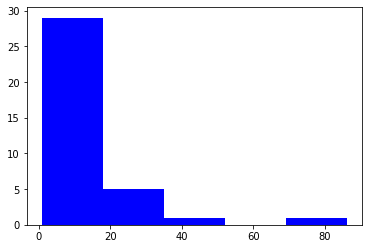

In [22]:
plt.hist(df_final.YES, bins=5, color="blue")
plt.show()

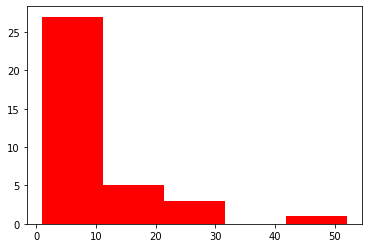

In [24]:
plt.hist(df_final.NO, bins=5, color="red")
plt.show()

In [16]:
Total=df_final.sum()
print(Total)

YES    403
NO     327
dtype: int64
